In [1]:
# imports
import time
from skimage import transform, io
from sklearn.model_selection import train_test_split
import os
import numpy as np

In [2]:
#import keras 
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.models import model_from_json

Using TensorFlow backend.


In [3]:
#SETTINGS
image_height = 112
image_width = 176
input_shape = (image_height, image_width, 1)
num_labels = 7
batch = 2
epochs = 3
labels = ["down","go","left","on","right","stop","up"]
PATH = "C:\\Users\\Filip\\Desktop\\Jupyter"

In [4]:
#loads .png dataset from png_directory and reformats it
#input: png_directory - path to directory with spectrograms.png
#output: x_train, y_train - np.array of training images and labels
#        reformated into Conv2D input format
#output: x_test, y_test - np.array of test images and labels
#        reformated into Conv2D input format
def load_dataset(png_directory):
    image_list = []
    label_list = []
    #append each image and image_label to image_list and label_list
    for file_name in os.scandir(png_directory):
        if file_name.path.endswith(".png"):
            image = io.imread(file_name.path, as_gray=True)
            image = transform.resize(image, (image_height,image_width), mode="symmetric",
                                    preserve_range=True)
            io.imshow(image)
            image_list.append(image)
            label_list.append(file_name.name[0])
    #split images and labels into train and test batches
    x_train, x_test, y_train, y_test = train_test_split(image_list,
                                                       label_list,
                                                       test_size = 0.2)
    #switch to np.array
    x_train = np.array(x_train)
    x_test = np.array(x_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    #reshape to match Conv2D input
    x_train = x_train.reshape(x_train.shape[0], image_height, image_width, 1)
    x_test = x_test.reshape(x_test.shape[0], image_height, image_width, 1)
    y_train = keras.utils.to_categorical(y_train, num_labels)
    y_test = keras.utils.to_categorical(y_test, num_labels)
    return x_train, x_test, y_train, y_test

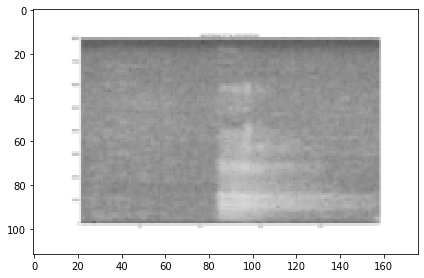

In [5]:
x_train, x_test, y_train, y_test = load_dataset(PATH)
#=======================MODEL=========================
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu",
                input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(num_labels, activation="softmax"))
#====================================================

In [6]:
#compilation
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.adam(),
             metrics=["accuracy"])
#model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 110, 174, 32)      320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 172, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 86, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 86, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 297216)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               38043776  
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [7]:
start_time = time.time()
#training
model.fit(x_train, y_train, batch_size=batch, epochs=epochs, verbose=1,
          validation_data=(x_test, y_test))
finish_time = time.time()
print("Training done in {} seconds".format(finish_time-start_time))

Train on 5 samples, validate on 2 samples
Epoch 1/3
5/5 [==============================] - 2s 489ms/step - loss: 0.8153 - accuracy: 0.6000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/3
5/5 [==============================] - 2s 457ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/3
5/5 [==============================] - 3s 515ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Training done in 8.005134105682373 seconds
